*Created by Petteri Nevavuori.*

---

# Deep Learning seminaari

Kirjana Goodfellow et al.: Deep Learning (2016)

Otsikot seuraavat pääotsikoiden tasolla kirjaa, mutta alaotsikot eivät aina.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#9.-Convolutional-Networks" data-toc-modified-id="9.-Convolutional-Networks-1">9. Convolutional Networks</a></span><ul class="toc-item"><li><span><a href="#9.1.-The-Convolution-Operation" data-toc-modified-id="9.1.-The-Convolution-Operation-1.1">9.1. The Convolution Operation</a></span></li><li><span><a href="#9.2-Motivation" data-toc-modified-id="9.2-Motivation-1.2">9.2 Motivation</a></span><ul class="toc-item"><li><span><a href="#Sparse-interactions" data-toc-modified-id="Sparse-interactions-1.2.1">Sparse interactions</a></span></li><li><span><a href="#Parameter-sharing" data-toc-modified-id="Parameter-sharing-1.2.2">Parameter sharing</a></span></li><li><span><a href="#Equivariance" data-toc-modified-id="Equivariance-1.2.3">Equivariance</a></span></li></ul></li><li><span><a href="#9.3-Pooling" data-toc-modified-id="9.3-Pooling-1.3">9.3 Pooling</a></span></li><li><span><a href="#9.4-Convolution-and-Pooling-as-an-Infinitely-Strong-Prior" data-toc-modified-id="9.4-Convolution-and-Pooling-as-an-Infinitely-Strong-Prior-1.4">9.4 Convolution and Pooling as an Infinitely Strong Prior</a></span></li><li><span><a href="#9.5-Variants-of-the-Basic-Convolution-Function" data-toc-modified-id="9.5-Variants-of-the-Basic-Convolution-Function-1.5">9.5 Variants of the Basic Convolution Function</a></span><ul class="toc-item"><li><span><a href="#Stride" data-toc-modified-id="Stride-1.5.1">Stride</a></span></li><li><span><a href="#Padding" data-toc-modified-id="Padding-1.5.2">Padding</a></span></li><li><span><a href="#Unshared-Convolution" data-toc-modified-id="Unshared-Convolution-1.5.3">Unshared Convolution</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-1.5.4">Training</a></span></li></ul></li><li><span><a href="#9.6-Structured-Outputs" data-toc-modified-id="9.6-Structured-Outputs-1.6">9.6 Structured Outputs</a></span></li><li><span><a href="#9.7-Data-Types" data-toc-modified-id="9.7-Data-Types-1.7">9.7 Data Types</a></span></li><li><span><a href="#9.8-Efficient-Convolution-Algorithms" data-toc-modified-id="9.8-Efficient-Convolution-Algorithms-1.8">9.8 Efficient Convolution Algorithms</a></span></li><li><span><a href="#9.9-Random-or-Unsupervised-Features" data-toc-modified-id="9.9-Random-or-Unsupervised-Features-1.9">9.9 Random or Unsupervised Features</a></span></li><li><span><a href="#9.10-Neuroscientific-Basis-for-Convolutional-Networks" data-toc-modified-id="9.10-Neuroscientific-Basis-for-Convolutional-Networks-1.10">9.10 Neuroscientific Basis for Convolutional Networks</a></span></li><li><span><a href="#9.11-Convolutional-Neural-Networks-and-the-History-of-Deep-Learning" data-toc-modified-id="9.11-Convolutional-Neural-Networks-and-the-History-of-Deep-Learning-1.11">9.11 Convolutional Neural Networks and the History of Deep Learning</a></span></li></ul></li></ul></div>

## 9. Convolutional Networks

Konvoluutioverkot (*convolutional networks, convolutional neural networks, CNN*) ovat ennenkaikkea tasomuotoisen datan käsittelyyn erikoistuneita verkkoja. Perinteisimmin konvoluutioverkkoja käytetään kuvien kanssa, mutta niitä voidaan käyttää myös useasta rivistä muodostuvan aikasarjadatan kanssa. Koska konvoluutioverkkojen kehitys on niin nopeasti etenevää tällä hetkellä, esitellään kirjassa konvoluutioverkkojen merkittävimmät komponentit. Samoin esitellään niitä verkkoihin liittyviä yksityiskohtia, joilla parhaiten menestyviä verkkoja on kehitetty.

### 9.1. The Convolution Operation

Yleisimmillään konvoluuutiolla tarkoitetaan kahdelle reaaliluvun vastaanottavalle funktiolle tehtävää operaatiota. Yksinkertainen esimerkki tästä on kohinainen funktio $f(x)$ ja liukuvan ikkunan keskiarvon funktio $g(x)$. Yhdessä nämä tuottavat funktion

$$ s(x) = (f * g)(x),$$

joka tasoittaa kohinaa. Tätä kutsutaan konvoluutioksi. Matemaattisesti konvoluution funktioiden on oltava vaihdannaisia siten, että $(f * g)(x)=(g * f)(x)$.

Konvoluutioverkkojen tapauksessa konvoluutio tehdään syötteitä (*input*) ja kerneleitä (*kernel, filter*) käsittelevien funktioiden kanssa. Kernelit ovat koulutuksen aikana opittavia parametritaulukoita, joiden avulla syötteistä tuotetaan piirrekarttoja. Tämä mahdollistaa mm. kuvien käsittelyn, sillä kerneleitä voidaan käyttää yksi- tai moniulotteiseen syötteeseen - kuva kanavineen käsitellään kernel kerrallaan. Tällöin yksikanavaisen kuvan ja kernelin konvoluutio-operaatio voidaan kirjoittaa kaavana seuraavasti:

$$ S(i,j)  = (K*I)(i,j).$$


Vaikka implementaatiotapoja kyseiselle operaatiolle löytyy joitakin, on usein käytetty implementaatio ristikorrelaatio (*cross-correlation*):

$$ S(i,j)  = (I*K)(i,j) = \sum_m \sum_n I(i+m,j+n)K(m,n),$$

jossa $(i,j)$ on yksi kuvan $I$ pikseli ja $(m,n)$ on kernelin $K$ koko. Konvoluutio tehdään tällöin syötteen $I$ ja kernelin $K$ pistetulona kerneliä vastaavalta alueelta. Pistetulo on matriisien vastaavien alkioiden tulojen summa. Alue määritellään lähtien kuvan pikselistä $(i,j)$ ja kattaen kernelin $K$ kokoinen alue. 

Alla sama esitetty kuvana:

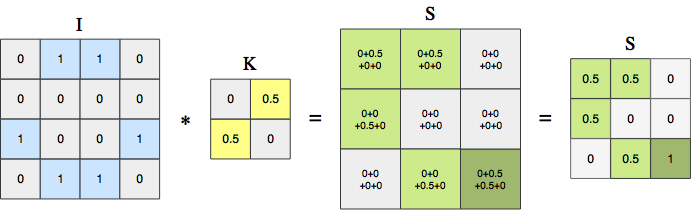

Kernel $K$ etsii kuvasta vinoja reunoja ja vain kuvan oikeassa alakulmassa esiintyy sellainen. Muualta löytyy osittaisia vinoja piirteitä. Kerneleitä on konvoluutioverkoissa normaalisti useita ja useissa kerroksissa.

### 9.2 Motivation

Konvoluutio käyttää apunaan kolmea perustanaan toimivaa ideaa, jotka edesauttavat menetelmää hyödyntäviä koneoppimisjärjestelmiä: harvoja vuorovaikutussuhteita (*sparse interactions*), parametrien jakamista (*parameter sharing*) ja samankaltaista muuttuvaisuutta (*equivariance*).

#### Sparse interactions

Perinteiset myötäkytketyt verkot toimivat siten, että kerrosten välillä jokainen edellisen kerroksen neuroni on tekemisissä jokaisen seuraavan kerroksen neuronin kanssa - ne ovat täysin kytkettyjä. Konvoluutioverkot ovat sen sijaan harvoja, kuten aiemmasta kuvastakin kävi ilmi. 

Koska kokonaisten kuvien sijasta käsitelläänkin pienempiä kerneleillä tuotettuja piirrekarttoja, on verkon parametrien määrä kerrosten välillä täysin kytkettyjä verkkoja pienempi. Tällöin kerneleitä käytetään löytämään syötteinä tuoduista kuvista merkityksillisiä piirteitä, kuten reunoja. Näin kuvan jokaista pikseliä ei käsitellä merkityksellisenä, jolloin koulutettavia parametreja ei tarvitse olla myöskään jokaiselle pikselille.

Vaikka kirjassa harvat kytkennät esitetään kiinteinä osittaiskytkentöinä, jossa edellisen kerroksen neuronit ovat kytketty kiinteästi osaan seuraavan kerroksen neuroita, on konvoluutioverkon harvakytkentäisyydessä suurin tekijä kerneleiden avulla tuotettujen pienempien kuvien harvuus - tiettyjä piirteitä löytyy vain joistain kohden kuvaa. Osittaiskytkentä on konvoluutioverkoissa täten ennemmin *dropout*-regularisointia vastaavaa, koulutuksen aikaista dynaamista ja syötteestä riippuvaa harvuutta.

#### Parameter sharing

Edelleen käyttäen perinteisiä verkkoja esimerkkinä, jokaista edeltävän kerroksen ulostuloa käytetään seuraavan kerroksen ulostulon laskentaan vain kerran. Sen sijaan konvoluutioverkoissa jokaista kerneliä käytetään lähtökohtaisesti syötteen jokaiselle alkiolle, kuvan tapauksessa pikselille. Sen sijaan että jokaiselle syötekuvan osalle tai alkiolle opittaisiin oma parametrien kokoonpano, opitaankin joukko koko kuvaan sovitettuja uniikkeja kerneleitä, jotka pyrkivät oppimaan merkittävimmät datasta löytyvät piirteet.

#### Equivariance

Kun funktio on samankaltaisesti muuttuva (*equivariant*), se kykenee löytämään toisistaan poikkeavista syötteistä niissä esiintyviä samoja piirteeitä. Jos kyseessä on kuva ja siitä tehty muunnos vaikkapa siirroksella, samankaltaisesti mukautuva funktio löytää kuvista samat piirteet muunnoksesta huolimatta. Siirroksella muunnetun kuvan piirteet ovat tosin ulostulossa siirroksen verran eri paikassa. Funktio toisin sanoen muuttuu eli mukautuu tällöin syötteen mukaisesti. Yksinkertaisten kyse on funktion robustisuudesta syötteen muunnoksia kohtaan.

### 9.3 Pooling

Syötteen hajottaminen piirrekarttoihin konvoluutiolla on konvoluutioverkon piilokerroksien operaatioista ensimmäinen. Tätä seuraa usein lineaarisuuden katkaiseminen esimerkiksi oikaistulla lineaarifunktiolla (*ReLU*), jota kutsutaan joskus havaintovaiheeksi (*detector stage*). Viimeinen operaatioista on koonti (*pooling*).

Koontivaiheessa epälineaariset piirrekartat syötetään valittuun koontifunktioon (*pooling function*). Tällöin piirrekartat arvot ryhmitellään ja näistä ryhmistä otetaan jokin valittu tilastollinen suure. Maksimikoonnissa (*max pooling*) otetaan ryhmäkohtainen suurin arvo, kun taas keskiarvokoonnissa (*mean pooling*) lasketaan alkioiden keskiarvo. 

Alla on esimerkki yhteen kernelin tuotokseen $S$ eli piirrekarttaan tehdystä maksimikoonnista:

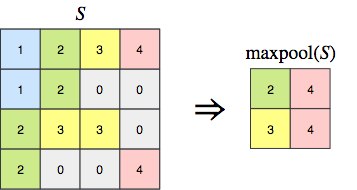

Koonnin ryhmän kokona on $(2,2)$ eivätkä ryhmät mene limittäin. Tällöin piirrekartta $S$ käytännössä puolitetaan siten, että jokaiselta yksittäiseltä ryhmältä otetaan sen suurin arvo talteen. Näin toimittaessa löydettyjen piirrekarttojen hienovaraisuutta saadaan rikottua ja niistä saadaan näin robustimpia pieniä muutoksia kohtaan. Esimerkiksi kasvot voivat olla hieman eri asennossa, mutta ne tunnistetaan silti ylimalkaisesti kasvoiksi. Näin malli saadaan paremmin löytämään jokin piirre ylipäätään sen sijaan, että sitä etsittäin vain jossain tarkassa tapauksessa.

Näin konvoluutioverkon kerroksen opittavalle funktiolle saadaan asetettua myös ennakkoehto (*prior*), että sen on oltava muuttumaton pienille kuvatason muunnoksille. Mikäli yhden piirrekartan sijaan koonti tehdään selkeästi toisista poikkeavien mutta samaa asiaa tunnistavien piirteiden kohdalla, voi verkko oppia muuttumattomaksi myös merkittävämpiä muunnoksia kohtaan.

Koonnilla on koulutuksen kannalta mieluisia sivuvaikutuksia. Kun alkuperäiset syötekuvat hajotetaan pienemmiksi piirrekartoiksi, on laskenta jo silloin tehokkaampaa verrattuna pikseli pikseliltä käsittelyyn. Kun piirrekartat vielä edelleen tiivistetään koonnilla, laskevat laskennan muistivaatimukset entisestään. Koonnin seurauksena syötteen tilastolliset ominaisuudet voivat myös parantua. Joissain tapauksessa koonnin käyttö hankaloittaa käytettyjen verkkojen arkkitehtuureja. Näin on mm. Boltzmannin koneiden (*Boltzmann machines*) ja autoenkooderien (*autoencoder*) kanssa. 

### 9.4 Convolution and Pooling as an Infinitely Strong Prior

Mallien parametreja voidaan alustaa ennalta jonkin todennäköisyysjakauman mukaisesti (*prior probability distribution*). Tällöin mallille asetetaan ennen koulutusta jo jotain ennakkoehtoja koulutukseen sen osalta, mihin mistä lähtöasetelmasta parametrit ylipäätään lähtevät kouluttumaan. Mikäli jakaumassa on paljon varianssia eli entropiaa, ennakkojakaumaa kutsutaan heikoksi. Vahvat ennakkojakaumat taas ovat hyvin keskittyneitä eli niillä on matala varianssi.

Äärettömän suuri ennakkojakauma pitää joitain parametreja täydellisen epätodennäköisinä, vaikka data tukisikin niiden käyttöä. Näin on konvoluutioverkkojen kanssa. Koska kuvat käydään kokonaisuudessaan läpi kernelkohtaisesti, pysyvät koko kuvan ajan yhden kernelin parametrit identtisinä. Tästä johtuen suuri osa piirrekarttojen arvoista saavat arvon nolla, sillä samaa piirrettä ei lähtökohtaisesti löydy kaikkialla kuvasta. Toisaalta myös tietyt piirteet painottuvat selvästi yli muiden, sillä ne määrittävät eniten opittavaa ilmiötä. Tällöin parametrien arvot keskittyvät vahvasti ja hajonta on pientä.

Siksipä siis konvoluutioverkkojen ongelmana onkin alisovittuminen. Mikäli tavoitteena on säilyttää merkittävimmät avaruudelliset (*spatial*) piirteet ja verkon jokaisessa vaiheessa käytetään koontia, voi koulutusvirhe laskemisen sijaan itseasiassa vain kasvaa. Mikäli merkitykselliset piirteet ovat syötteissä kaukana toisistaan, konvoluutioverkon keskittynyt ennakkojakauma tekee sen käytöstä epäsuotuisaa.

Konvoluutioverkkojen kerroskohtaisten operaatioiden tuoman äärettömän vahvan parametrien ennakkojakauman vuoksi konvoluutioverkot ovat vertailtavissa vain toisiin konvoluutioverkkoihin. Täysin myötäkytketyt verkot kykenevät oppimaan lähes mitä vain, vaikka syötteenä olisi kaikki kuvan pikselit. Konvoluutioverkoilla näin ei ole.

### 9.5 Variants of the Basic Convolution Function

Neuroverkkojen yhteydessä konvoluutiolla tarkoitetaan harvemmin itse matemaattista konvoluutio-operaatiota, sillä käytännön neuroverkkototeutukset eroavat siitä jokseenkin. Ensinnäkin neuroverkkojen konvoluutiolla tarkoitetaan monen rinnakkaisen konvoluutio-operaation suorittamista rinnakkain useamman kernelin käytöstä johtuen.  Tämän lisäksi matemaattisen konvoluutio-operaation reaaliarvojen sijasta neuroverkkojen konvoluutiot tehdään lähes aina vähintään vektoreilla. Konvoluution vaihdannaisuusvaatimuskaan ei konvoluutioverkkojen kohdalla väistämättä täyty.

Hyvä esimerkki edellä mainituista on värikuva, jonka jokainen pikseli sisältää lukuarvon kunkin kanavan osalta. Pikselit ovat tällöin $[R,G,B]^T$ vektoreita. Kun tähän vielä yhdistetään monikerroksisuus, jossa yhden konvoluutiokerroksen ulostulo toimii seuraavan syötteenä, ei takeita konvoluution funktioiden vaihdannaisuudesta ole. Esimerkiksi jos $C_1$ on ensimmäinen konvoluutioverkon kerros ja $C_2$ sitä seuraava, ei voida varmuudella sanoa, että $(C_1*C_2)(x)=(C_2*C_1)(x)$, etenkään ulostulojen kanavamäärien osalta.

#### Stride

Tähän mennessä konvoluutioverkon konvoluutio on esitetty siten, että se tehdään syötekuvan jokaiselle pikselille kullakin kernelillä. Se voidaan tehdä myös erikseen määritellyn askelpituuden (*stride*) mukaisesti, jolloin kerneleitä siirretään haluttu määrä vaaka- ja pystypikseleitä kiinteän yhden pikselin sijasta. 

Alla on havainnoillistava kuva:

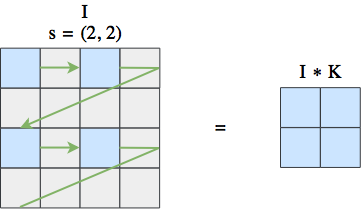

Syötekuvasta $I$ etsitään piirteitä siten, että askelpituus $s=(2,2)$. Verrattuna pikseli kerrallaan tehtävään konvoluutioon kuvaa pienennetään vielä merkittävämmin, sillä piirteitä etsitään harvemmin. Pituus- ja vaaka-askelten ei tarvitse olla symmetrisiä.

#### Padding

Konvoluutioverkkojen implementoinneissa on myös mahdollista määritellä sekä syötteille että kerrosten ulostuloille pehmusteet (*padding*). 

Lähestytään tätäkin asiaa esimerkkikuvan kautta. Otetaan ensin käsittelyyn kuvasyöte $I$.

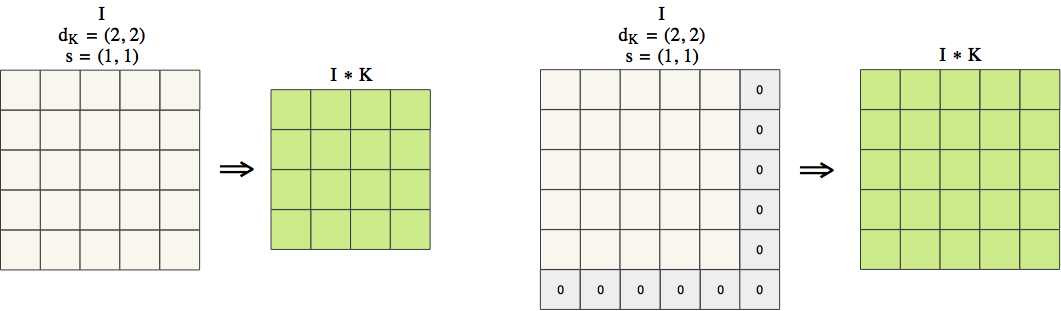

Esimerkin muuttujista $d_K$ tarkoittaa kernelin kokoa ja $s$ askelta. Piirrekartta saadaan  sovitettua vain neljä kertaa pehmustamattomaan kuvaan, jolloin osa kuvan pikseleistä jää aina käyttämättä. Jos kuvaa pehmustetaan nollilla oikeanpuoleisen kuvan tapaan, saadaan koko kuva käytyä kernelillä $K$ läpi ja tuloksena on syötteen kanssa identtisen kokoinen piirrekartta $I*K$.

Pehmustettavana syötteenä voi olla yhtäläillä myös konvoluution ulostulo $k\in K$ ja operaationa tällöin koonti. Tällöin pehmustaminen vaikuttaa koonnin ulostulon dimensioihin.

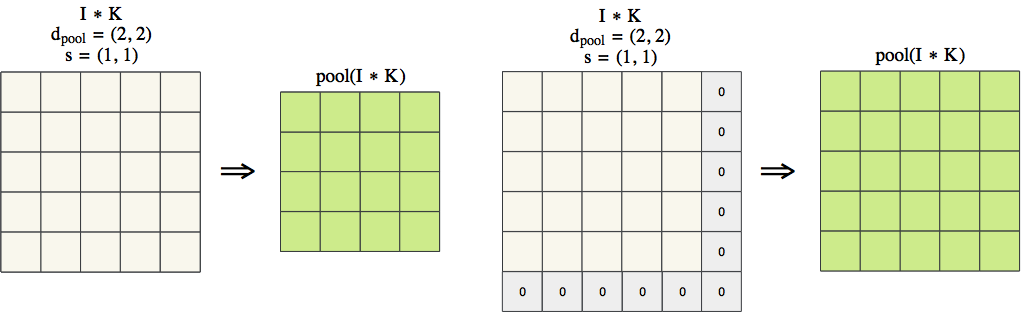

Jälleen pehmustus auttaa siihen, että kokonainen piirrekartta eli konvoluution tulos huomioidaan. Ilman pehmustusta sekä ulostulon koko pienenee että informaatiota jää käyttämättä.

Nollilla pehmustamisella on kolme mainitsemisen arvoista erityistapausta:

- **Ei pehmustusta**: Syötettä ei pehmusteta lainkaan ja vain täysin täydelliset konvoluutiot sallitaan (esimerkkikuvan vasen tapaus). Tätä kutsutaan joskus kelvolliseksi (*valid*) konvoluutioksi ja konvoluutio- tai koontioperaatioiden seurauksena ulostulon dimensiot pienenevät suhteessa muihin tapauksiin nopeammin. Tämä rajoittaa käytettävien konvoluutiokerrosten määrää.

- **Tasoittava pehmustus**: Syötteitä pehmustetaan vain sen verran, että seuraava operaatio voi hyödyntää saman kokoista syötettä. Askeleen ollessa yksi suuntaansa on tuotettu ulostulo samankokoinen syötteen kanssa. Tällöin verkon syvyyttä ei rajoita syötteen dimensioiden asteittainen häviäminen. Reunojen lähellä olevat pikselit ovat kuitenkin aliedustettuja verkon laskennassa.

- **Täysi pehmustus**: Syöte pehmustettaisiin sen joka sivulta siten, että jokainen pikseli käydään kernelillä läpi  yhtä monta kertaa. Kuten tasoittavassa pehmustuksessa, reunojen pikselit jäävät tällöin aliedustetuiksi syötteen keskialueen pikseleihin nähden. Verrattuna esimerkkikuvien pehmustukseen, pehmustus on symmetristä kuvan joka sivulla.

#### Unshared Convolution

Kun on ennalta tiedossa, että kaikkia piirteitä ei ole mielekästä etsiä joka paikasta, ovat paikallisesti yhdistetyt kerrokset perinteistä konvoluutiota parempi vaihtoehto. Tätä kutsutaan ei-jaetuksi konvoluutioksi (*unshared convolution*). 

Tällöin vain osa edellisen kerroksen neuroneista on yhdistetty yhteen seuraavan kerroksen kuhunkin neuroniin, jolloin seuraava kerros käsittelee vain edellisen kerroksen syötteitä ryhmissä, s.o. paikallisesti. Konvoluutioverkkojen tapauksessa neuronien sijasta jokaiselle konvoluution tuottamalle piirrekartalle määritetään omat painot. Piirrekartat tai niiden koonnit yhdistetään tämän jälkeen vain osittain seuraavaan kerrokseen. 

Ositeltu konvoluutio (*tiled convolution*) on kompromissi perinteisen ja ei-jaetun konvoluution välillä. Tällöin käytetään kerneleiden settiä, josta otetaan käyttöön jokaisen syötteessä tapahtuvan siirtymän jälkeen seuraava kernel järjestyksessä. Näin saadaan tasapainoa sekä perinteisen konvoluution että paikallisten piirteiden havaitsemisen välillä. Havainnollistetaan jälleen.

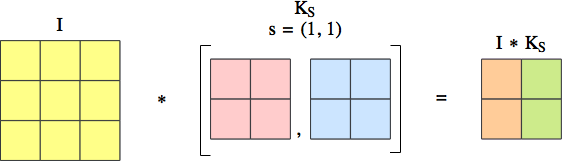

Erottelun vuoksi kerneleiden setistä käytetään merkintää $K_S$. Perinteisessä konvoluutioverkon konvoluutiossa kuvasta $I$ tuotettaisiin vain yhden kernelin mukaisia ulostuloja, kun ositellussa konvoluutiossa kerneleitä vaihdellaan systemaattisesti. Mikäli kerneleitä olisi setissä vaikkapa kolme, vain setin ensimmäinen kernel tulisi käytetyksi $I$:n kanssa kahdesti.

Paikallisesti yhdistetyillä konvoluutioverkoilla on luontaisesti kyky oppia mahdollisesti samasta piirteistä sen eri muunnoksia. Tämä tekee mallista vieläkin robustimman piirteiden muutoksia kohtaan.

#### Training 

Konvoluutioverkot ovat koulutettavissa *backpropilla*. Jotta konvoluutioverkot voivat oppia, on niiden kerneleille voitava laskea gradientit suhteessa mallin tuottamaan virheeseen. Jotta gradientit voidaan laskea, on otettava gradientteja laskiessa huomioon kulloinkin käytetty askelkoko, syötteiden dimensiot ja mahdollinen pehmennys. Kun nämä huomioidaan, on kerneleiden parametrien gradientit laskettavissa sopivilla matriisimuunnoksilla, joista merkittävin on konvoluutio-operaation matriisin transpoosi.

Normaalisti konvoluutioverkossa ei käytetä lineaarisia toimintoja syötteen käsittelyissä. Tavallista on myös, että jokaiselle kerrokselle tai paikalliselle yhteydelle on oma *bias*-terminsä ja verkon ulostulon jokaiselle kanavalle omansa.

### 9.6 Structured Outputs

Konvoluutioverkkoja voidaan käyttää myös moniulotteisen jäsennellyn ulostulon tuottamiseen. Tällöin yksittäisen luokan sijasta voidaan tuottaa esimerkiksi pikselitason luokittelumaskeja. Tällöin voidaan välttää koontia, sillä se tavallisesti pienentää verkon lopullista ulostuloa suhteessa syötteeseen heikentäen syötteen ja ulostulon keskinäistä vertailua. Toisaalta on myös mahdollista, että ulostulo käsitellään matalampiresoluutioisena luokittelumaskina, jossa yksi pikseli vastaa pienehköä aluetta syötteessä.

Tällöin konvoluutioverkosta rakennetaan esimerkiksi rekursiivista verkkoa muistuttava kokonaisuus, jossa samojen konvoluutiokerrosten piirrekarttoja käytetään useita kertoja ja verkon ulostulo kytketään takaisin piilokerroksiin. Tällöin hyödynnetään sitä oletusta, että kuvissa esiintyvät vierekkäiset pikselit liittyvät usein samaan luokkaan eli tunnistettavaan hahmoon.

### 9.7 Data Types

Vaikka konvoluutioverkkoihin tavallisesti syötetään kuvia, voidaan siihen syöttää monenlaista dataa sekä yksi- että monikanavaisena:

- *1D*: Ääniaaltodata, partikkelin suuntavektoridata.
- *2D*: Harmaasävy- ja värikuvadata.
- *3D*: Volumetrinen data, videodata.

Konvoluutioverkko kykenee käsitelemään myös koon puolesta vaihtelevia syötteitä, mikä ei ole luontaisesti mahdollista perinteisillä myötäkytketyillä verkoilla. Kuvan koosta riippuen vain kerneleiden syötekohtainen käyttömäärä vaihtelee, mutta kerneleiden määrä ja ominaisuudet säilyvät samoina syötteestä toiseen. Vaihtelevien syötekokojen kohdalla on kuitenkin ensiarvoisen tärkeää, että syötteet liittyvät aina vain johonkin tiettyyn luokkaan tai ilmiöön. Sillä jos koon lisäksi sisältö vaihtuu, ei konvoluutiota voida suoraan sellaisenaan hyödyntää.

### 9.8 Efficient Convolution Algorithms

Laskennallisen tehostamisen, kuten rinnakkaislaskennan, lisäksi konvoluutioverkkojen toimintaa voidaan myös nopeuttaa konvoluutioalgoritmin valinnalla. Tämä on aktiivista tutkimuksen aluetta. Kun sekä syöte että kernel nähdään omina signaaleinaan, voidaan konvoluutiota käsitellä Fourier-muunnoksena. Tämä voi olla suuremman kokoluokan ongelmissa nopeampi laskentatapa, kuin naiivi suoraviivainen konvoluutio. Toisaalta mikäli kernelit voidaan erotella vektoreihin, on suoraviivainen konvoluutio tehoton. Tällöin on huomattavasti tehokkaampaa suorittaa konvoluutio nähin vektoreihin, kuin yhteen moniulotteiseen kerneleiden matriisiin.

### 9.9 Random or Unsupervised Features

Koulutuksen vaativin osa on kerneleiden ja tätä kautta dataa mallintavien piirteiden oppiminen. Kerneleiden satunnaisen alustamisen ohella on muitakin alustusstrategioita, joilla voidaan nopeuttaa piirteiden oppimista.

Ensimmäinen näistä on manuaalinen kerneleiden säätäminen. Kartat voidaan säätää löytämään tiettyjä muotoja, kuten reunoja, kulmia ja pyöreitä muotoja. Toinen on kerneleiden alustus ohjaamattoman oppimisen keinoin. Tällöin voidaan esimerkiksi tehdä koulutusdatalle ensin klusterointia, josta saatavia tuloksia sitten hyödynnetään kerneleiden alustamisessa. Satunnaisesti alustetut kernelit ovat empiirisissä tutkimuksissa osoittautuneet toimiviksi konvoluutioverkoissa. Konvoluutiokerroksissa, joissa suoritetaan myös lopuksi koonti, näyttää tapahtuvan luonnollisesti erikoistumista tietyille piirteille.

Kuten myötäkytketyt verkot, myös konvoluutioverkot voidaan kouluttaa kerros kerrallaan. Tämä helpottaa koulutusta etenkin syvien konvoluutioverkkojen tapauksissa ja edesauttaa myös piirteiden löytämistä. Toisaalta nykyisin käytössä on jo huomattavasti paremmin laskentatehoa, jolloin konvoluutioverkotkin voidaan kouluttaa suoraan sellaisinaan ilman pilkkomista.

### 9.10 Neuroscientific Basis for Convolutional Networks

Konvoluutioverkkojen perustavana toimivat ajatukset juontavat juurensa hyvin vahvasti biologiaan ja neurotieteisiin. Aiheen tutkimus on saanut alkunsa jo 1950-luvulla, kun tahdottiin saada selvyyttä ihmisten ja eläinten tapaa hahmottaa asioita havainnoistaan. Tutkimuksissa havaittiin, että näköhavainnon ensimmäisenä vastaanottavat aivojen osat aktivoituivat selkeiden erottuvien muotojen, kuten rajojen ja reunojen kohdilla. 

Tästä seurasi mm. konvoluutioverkkoihin liittyvän tutkimuksen kehittyminen etenkin aivojen näköalueen toimintatavan matkimisessa. Konvoluutioverkot pyrkivät mallintamaan aivojen näköaluetta kolmella tapaa: 

- **Kerneleiden avulla**: Näköalue on pinta, jonka alueet vastaavat silmän pohjan pintaan. Konvoluutioverkot matkivat tätä pintamaisten eli kaksiulotteisten piirrekarttojen avulla.

- **Lineaarisen aktivoinnin avulla**: Näköalueessa yksinkertaisia soluja, jotka aktivoituvat paikallisesti. Konvoluutioverkoissa vastaavina toimivat konvoluution jälkeiset aktivointifunktiot.

- **Piirteiden robustisuuden avulla**: Näköalueessa on myös monimutkaisempia soluja, jotka takaavat yksinkertaisten solujen havaitsemien piirteiden robustisuuden (*invariance to translation and transformation*). Konvoluutioverkoissa tämä toteutetaan koonnin keinoin.

Vaikka ihmisaivot ovat kokonaisuutena todella paljon niiden yksittäistä osaa monimutkaisemmat, on konvoluutioverkoilla kyetty mallintamaan näköhavainnon ensimmäistä läpikulkua silmästä aina aivojen näköalueen läpi näyttämällä kuvaa vain hyvin pienen hetken. Jos kuvaa näytetään yhtään pidempään, alkaa aivojen takaisinsyöttömekanismit aktivoimaan muita osia ja havaintoja ruvetaan prosessoimaan paljon monimutkaisemmin ja -ulotteisemmin.

Kaikenkaikkiaan, kuten muidenkin neuroverkkotyyppien kohdalla, konvoluutioverkot ovat vain biologisista ja toistaiseksi ihmisen täydellisen matkintakyvyn ulottumattomissa olevista hienosäädetyistä mekanismeista vain perusideoita ammentava varjo. Toisin sanoen verkon ideat pohjaavat biologiaan, mutta sen biologisen idolin toimintatapoja ei ymmärretä niin hyvin, että menetelmän voitaisiin sanoa toimivan kuten biologiset menetelmät.

Konvoluutioverkkojen kehitys lähti itseasiassa jopa liikkeelle viiveneuroverkoista (*time delay neural neutworks*), jotka ovat yksiulotteisia konvoluutioverkkoja ja kuitenkin samalla biologisesti lähes mahdottomia. Tätä kehitystä laajennettiin kaksiulotteisen datan alueelle, josta päästiin nykyisiin konvoluutioverkkoihin. Tällöin voitaisiin jopa hyvällä omallatunnolla todeta, että konvoluutioverkkojen vertailu biologiseen näköhavaintojen käsittelyyn on, ellei suoranaisesti jälkiviisasta, niin ainakin vertailun kohdetta redusoivaa.

### 9.11 Convolutional Neural Networks and the History of Deep Learning

Kuten edellisessä aliluvussa todettiin, konvoluutioverkkojen lähtökohtana on ihmisten ja eläinten näköhavaintojen muodostumisen tutkimus. Nykyaikaisia konvoluutioverkkoja on käytetty aina 1990-luvun lopulta alkaen jopa kaupallisissa tunnistustehtävissä, mm. kuittien lukemisessa ja käsikirjoituksen sekä tekstin tunnistuksessa.

Verkkoja on käytetty myös menestyksekkäästi monissa kuvan- ja hahmontunnistuksen kilpailussa, joista ehkä tunnetuin on ImageNet Large Scale Visual Recognition Competition eli ILSVRC. Etenkin vuoden 2012 jälkeen konvoluutioverkkoja on käytetty aina vain laajenevassa mittakaavassa ja kasvavalla menestyksellä.